In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

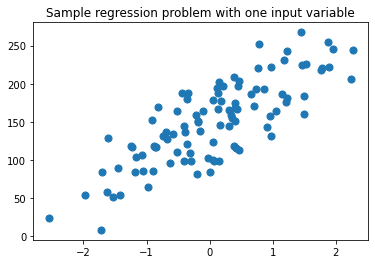

In [2]:
from sklearn.datasets import make_regression

# Synthetic dataset for simple regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1, n_informative=1, bias = 150.0,
noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

### Least-Squares

**$$RSS (w,b) = \sum_{\{i=1\}}^{N} \left ( y_i - \hat{y}_i \right )^2 =\sum_{\{i=1\}}^{N} \left ( y_i - \left ( w\cdot x_i +b_i \right ) \right )^{2}$$**

In [3]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

print(f'linear model coeff (w): {linreg.coef_}')
print(f'linear model intercept(b): {linreg.intercept_.round(3)}')
print(f'R-Squared score (training): {linreg.score(X_train, y_train).round(3)}')
print(f'R-Squared score (testing): {linreg.score(X_test, y_test).round(3)}')

linear model coeff (w): [45.70870465]
linear model intercept(b): 148.446
R-Squared score (training): 0.679
R-Squared score (testing): 0.492


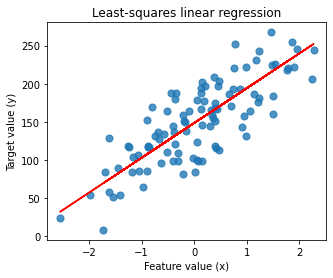

In [4]:
# plot
plt.figure(figsize=(5,4))

plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')

plt.show()

### Ridge regression

**$$RSS_{RIDGE} (w,b) = \sum_{\{i=1\}}^{N} \left ( y_i - \left ( w\cdot x_i +b_i \right ) \right )^{2} + \alpha \sum_{\{j=1\}}^{p} w_{j}^{2}$$**

In [8]:
from adspy_shared_utilities import load_crime_dataset
(X_crime, y_crime) = load_crime_dataset()

from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

linridge = Ridge(alpha = 20.0).fit(X_train, y_train)

print('Crime dataset')
print(f'Ridge regression linear model intercept: {linridge.intercept_}')
print(f'Ridge regression linear model coeff: {linridge.coef_.round(3)}')
print(f'R-Squared score (training): {linridge.score(X_train, y_train).round(3)}')
print(f'R-Squared score (testing): {linridge.score(X_test, y_test).round(3)}')
print(f'Number of non-zero features: {np.sum(linridge.coef_ != 0)}')

Crime dataset
Ridge regression linear model intercept: -3352.423035846143
Ridge regression linear model coeff: [ 2.0000e-03  2.1932e+01  9.5630e+00 -3.5918e+01  6.3650e+00 -1.9689e+01
 -3.0000e-03  1.6630e+00 -7.0000e-03 -6.9550e+00  1.7194e+01 -5.6280e+00
  8.8350e+00  6.7900e-01 -7.3360e+00  7.0000e-03  1.0000e-03  5.0000e-03
 -4.8990e+00 -1.7927e+01  9.1760e+00 -1.2450e+00  1.2180e+00  1.0323e+01
 -3.7800e+00 -3.7340e+00  4.7460e+00  8.4270e+00  3.0925e+01  1.1864e+01
 -2.0520e+00 -3.8221e+01  1.8508e+01  1.5250e+00 -2.2009e+01  2.4630e+00
  3.2900e-01  4.0220e+00 -1.1290e+01 -5.0000e-03  4.2705e+01 -1.0000e-03
  1.4080e+00  9.3500e-01 -3.0050e+00  1.1240e+00 -1.8249e+01 -1.5465e+01
  2.4192e+01 -1.3250e+01 -4.2000e-01 -3.5971e+01  1.2979e+01 -2.8077e+01
  4.3851e+01  3.8659e+01 -6.4602e+01 -1.6371e+01  2.9040e+01  4.1550e+00
  5.3403e+01  2.0000e-02 -5.4700e-01  1.2388e+01  1.0353e+01 -1.5720e+00
  3.1590e+00  8.7780e+00 -2.9472e+01 -0.0000e+00  0.0000e+00 -0.0000e+00
 -0.0000e+00 

**Ridge regression with feature normalization (MinMax scaling)**

**$$x_i^{'} = \frac{(x_i - x_i^{MIN})} {x_i^{MAX} - x_i^{MIN}}$$**

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha = 20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print(f'Ridge regression linear model intercept: {linridge.intercept_}')
print(f'Ridge regression linear model coeff: {linridge.coef_.round(3)}')
print(f'R-Squared score (training): {linridge.score(X_train_scaled, y_train).round(3)}')
print(f'R-Squared score (testing): {linridge.score(X_test_scaled, y_test).round(3)}')
print(f'Number of non-zero features: {np.sum(linridge.coef_ != 0)}')



Crime dataset
Ridge regression linear model intercept: 933.390638504415
Ridge regression linear model coeff: [  88.688   16.489  -50.303  -82.905  -65.895   -2.277   87.741  150.949
   18.88   -31.056  -43.135 -189.443   -4.527  107.979  -76.534    2.86
   34.952   90.135   52.464  -62.109  115.018    2.669    6.943   -5.666
 -101.553  -36.909   -8.705   29.12   171.26    99.369   75.066  123.635
   95.243 -330.61  -442.302 -284.497 -258.372   17.664 -101.707  110.648
  523.136   24.821    4.865  -30.468   -3.518   50.579   10.848   18.277
   44.112   58.336   67.087  -57.935  116.145   53.812   49.016   -7.623
   55.143  -52.089  123.393   77.126   45.498  184.912  -91.357    1.08
  234.093   10.389   94.717  167.919  -25.14    -1.182   14.604   36.771
   53.199  -78.864   -5.899   26.048  115.153   68.741   68.286   16.526
  -97.905  205.204   75.973   61.379  -79.832   67.267   95.671  -11.884]
R-Squared score (training): 0.615
R-Squared score (testing): 0.599
Number of non-zero fea

In [13]:
# Ridge regression with regularization parameter: alpha

print('Ridge regression: effect of alpha regularization parameter\n')

for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print(f'Alpha = {this_alpha}\n num abs(coeff) > 1.0: {num_coeff_bigger}, \
    r-squared training: {r2_train.round(2)}, r-squared test: {r2_test.round(2)}\n')
        

Ridge regression: effect of alpha regularization parameter

Alpha = 0
num abs(coeff) > 1.0: 88,     r-squared training: 0.67, r-squared test: 0.5

Alpha = 1
num abs(coeff) > 1.0: 87,     r-squared training: 0.66, r-squared test: 0.56

Alpha = 10
num abs(coeff) > 1.0: 87,     r-squared training: 0.63, r-squared test: 0.59

Alpha = 20
num abs(coeff) > 1.0: 88,     r-squared training: 0.61, r-squared test: 0.6

Alpha = 50
num abs(coeff) > 1.0: 86,     r-squared training: 0.58, r-squared test: 0.58

Alpha = 100
num abs(coeff) > 1.0: 87,     r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000
num abs(coeff) > 1.0: 84,     r-squared training: 0.31, r-squared test: 0.3



### Lasso regression (with MinMax)

**$$RSS_{LASSO} (w,b) = \sum_{\{i=1\}}^{N} \left ( y_i - \left ( w\cdot x_i +b_i \right ) \right )^{2} + \alpha \sum_{\{i=1\}}^{p} \left | w_j \right |$$**

In [18]:
from sklearn.linear_model import Lasso

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

# normalization/scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit model
linlasso = Lasso(alpha = 2.0, max_iter = 10000).fit(X_train_scaled, y_train)

# Results
print('Crime dataset')
print(f'lasso regression linear model intercept: {linlasso.intercept_}')
#print(f'lasso regression linear model coeff:\n{linlasso.coef_}')
print(f'Non-zero features: {np.sum(linlasso.coef_ != 0)}')
print(f'R-squared score (training): {linlasso.score(X_train_scaled, y_train).round(3)}')
print(f'R-squared score (test): {linlasso.score(X_test_scaled, y_test).round(3)}\n')
print(f'Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)), key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print(f'\t{e[0]}, {e[1]}')

Crime dataset
lasso regression linear model intercept: 1186.6120619985797
Non-zero features: 20
R-squared score (training): 0.631
R-squared score (test): 0.624

Features with non-zero weight (sorted by absolute magnitude):
	PctKidsBornNeverMar, 1488.3651222865124
	PctKids2Par, -1188.7396867043233
	HousVacant, 459.5379990335851
	PctPersDenseHous, 339.0446880418524
	NumInShelters, 264.9320655456725
	MalePctDivorce, 259.3288922599618
	PctWorkMom, -231.42347299198698
	pctWInvInc, -169.6756445649249
	agePct12t29, -168.18346054422747
	PctVacantBoarded, 122.6922182570517
	pctUrban, 119.69381940226314
	MedOwnCostPctIncNoMtg, -104.57143405478084
	MedYrHousBuilt, 91.4120224243394
	RentQrange, 86.35600041637123
	OwnOccHiQuart, 73.14365855972208
	PctEmplManu, -57.529919657794565
	PctBornSameState, -49.39355187830682
	PctForeignBorn, 23.448864495368813
	PctLargHouseFam, 20.144194150328214
	PctSameCity85, 5.197753692189756


In [21]:
# Lasso regression with regularization parameter: alpha
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print(f'Alpha = {alpha}\nFeatures kept: {np.sum(linlasso.coef_ != 0)}, \
     r-squared training: {r2_train}, \ r-squared test: {r2_test}\n')

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.5
Features kept: 35,      r-squared training: 0.6502658005145774, \ r-squared test: 0.5807254290525508

Alpha = 1
Features kept: 25,      r-squared training: 0.6410945990637387, \ r-squared test: 0.604675068224528

Alpha = 2
Features kept: 20,      r-squared training: 0.6307013668705859, \ r-squared test: 0.6237725857015401

Alpha = 3
Features kept: 17,      r-squared training: 0.6175075629745033, \ r-squared test: 0.6271545545325148

Alpha = 5
Features kept: 12,      r-squared training: 0.6009056477237703, \ r-squared test: 0.61403904256862

Alpha = 10
Features kept: 6,      r-squared training: 0.56710717045458, \ r-squared test: 0.578182074681105

Alpha = 20
Features kept: 2,      r-squared training: 0.50948494579772, \ r-squared test: 0.5035904805856334

Alpha = 50
Features kept: 1,      r-squared training: 0.31324382309340326, \ r-squared test: 0.30210709850944695



### Polynomial regression

**$$x = (x_0,x_1) \rightarrow x' = (x_0,x_1,x_0^2, x_0x_1, x_1^2)$$**

**$$\hat{y} = \hat{w}_0x_0 + \hat{w}_1x_1 + \hat{w}_{00}x_0^2 + \hat{w}_{01}x_0x_1 + \hat{w}_{11}x_1^2 + b$$**

In [4]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7, random_state=0)

X_F1.shape
#plt.figure()

#plt.title('Complex regression problem with one input variable')
#plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)

#plt.show()

(100, 7)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state = 0)

# fit model
linreg = LinearRegression().fit(X_train, y_train)

print(f'linear model coeff (w): {linreg.coef_}')
print(f'linear model intercept (b): {linreg.intercept_}')
print(f'R-squared score (training): {linreg.score(X_train, y_train)}')
print(f'R-squared score (test): {linreg.score(X_test, y_test)}')

linear model coeff (w): [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
linear model intercept (b): 1.54250919753731
R-squared score (training): 0.7223750207373035
R-squared score (test): 0.7221339576925419


In [25]:
# Compare to (quadratic) polynomial fit
poly = PolynomialFeatures(degree = 2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

print(f'(poly deg 2) linear model coeff (w):\n{linreg.coef_}')
print(f'(poly deg 2) linear model intercept (b): {linreg.intercept_}')
print(f'(poly deg 2) R-squared score (training): {linreg.score(X_train, y_train)}')
print(f'(poly deg 2) R-squared score (test): {linreg.score(X_test, y_test)}\n')

(poly deg 2) linear model coeff (w):
[ 3.40951018e-12  1.66452443e+01  2.67285381e+01 -2.21348316e+01
  1.24359227e+01  6.93086826e+00  1.04772675e+00  3.71352773e+00
 -1.33785505e+01 -5.73177185e+00  1.61813184e+00  3.66399592e+00
  5.04513181e+00 -1.45835979e+00  1.95156872e+00 -1.51297378e+01
  4.86762224e+00 -2.97084269e+00 -7.78370522e+00  5.14696078e+00
 -4.65479361e+00  1.84147395e+01 -2.22040650e+00  2.16572630e+00
 -1.27989481e+00  1.87946559e+00  1.52962716e-01  5.62073813e-01
 -8.91697516e-01 -2.18481128e+00  1.37595426e+00 -4.90336041e+00
 -2.23535458e+00  1.38268439e+00 -5.51908208e-01 -1.08795007e+00]
(poly deg 2) linear model intercept (b): -3.205674398929146
(poly deg 2) R-squared score (training): 0.9685996830172934
(poly deg 2) R-squared score (test): 0.8046437550509971



Polynomial regression with Ridge to avoid overfitting

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print(f'(poly deg 2 + Ridge) linear model coeff (w):\n{linreg.coef_}')
print(f'(poly deg 2 + Ridge) linear model intercept (b): {linreg.intercept_}')
print(f'(poly deg 2 + Ridge) R-squared score (training): {linreg.score(X_train, y_train)}')
print(f'(poly deg 2 + Ridge) R-squared score (test): {linreg.score(X_test, y_test)}\n')

(poly deg 2 + Ridge) linear model coeff (w):
[ 0.          2.229281    4.73349734 -3.15432089  3.8585194   1.60970912
 -0.76967054 -0.14956002 -1.75215371  1.5970487   1.37080607  2.51598244
  2.71746523  0.48531538 -1.9356048  -1.62914955  1.51474518  0.88674141
  0.26141199  2.04931775 -1.93025705  3.61850966 -0.71788143  0.63173956
 -3.16429847  1.29161448  3.545085    1.73422041  0.94347654 -0.51207219
  1.70114448 -1.97949067  1.80687548 -0.2173863   2.87585898 -0.89423157]
(poly deg 2 + Ridge) linear model intercept (b): 5.418093049255203
(poly deg 2 + Ridge) R-squared score (training): 0.8257620613919462
(poly deg 2 + Ridge) R-squared score (test): 0.8251115209759514

